# Plotting and Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [5]:
data = np.arange(10) #Numbers from 0 to 9
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

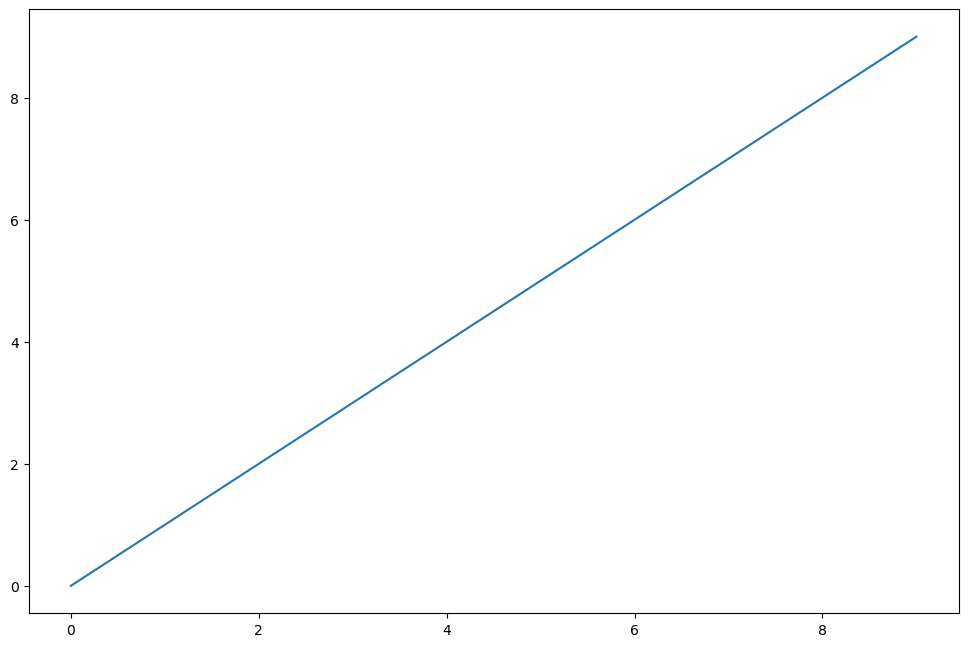

In [44]:
plt.plot(data) #Simple line plot

## Figures and Subplots

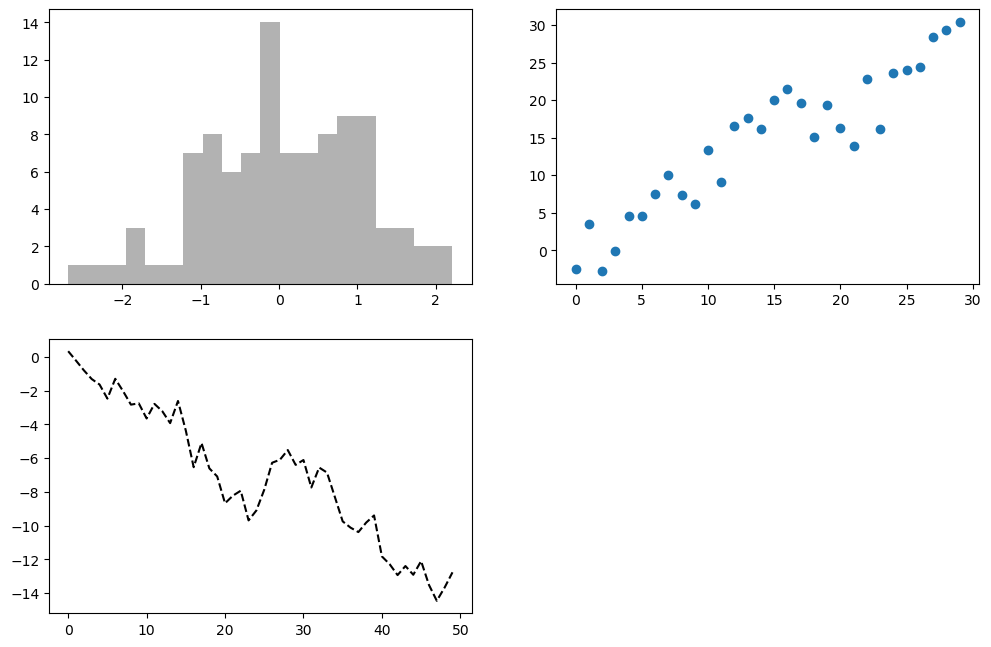

In [45]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) #Add a 2x2 subplot to the first section
ax2 = fig.add_subplot(2, 2, 2) #Add a 2x2 subplot to the second section
ax3 = fig.add_subplot(2, 2, 3) #Add a 2x2 subplot to the thrid section
plt.plot(np.random.randn(50).cumsum(), 'k--') #Adds to the most recently created subplot
_ = ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3) #Create histogram
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30)) # Create scatter graph

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C28D83448>,
      dtype=object)

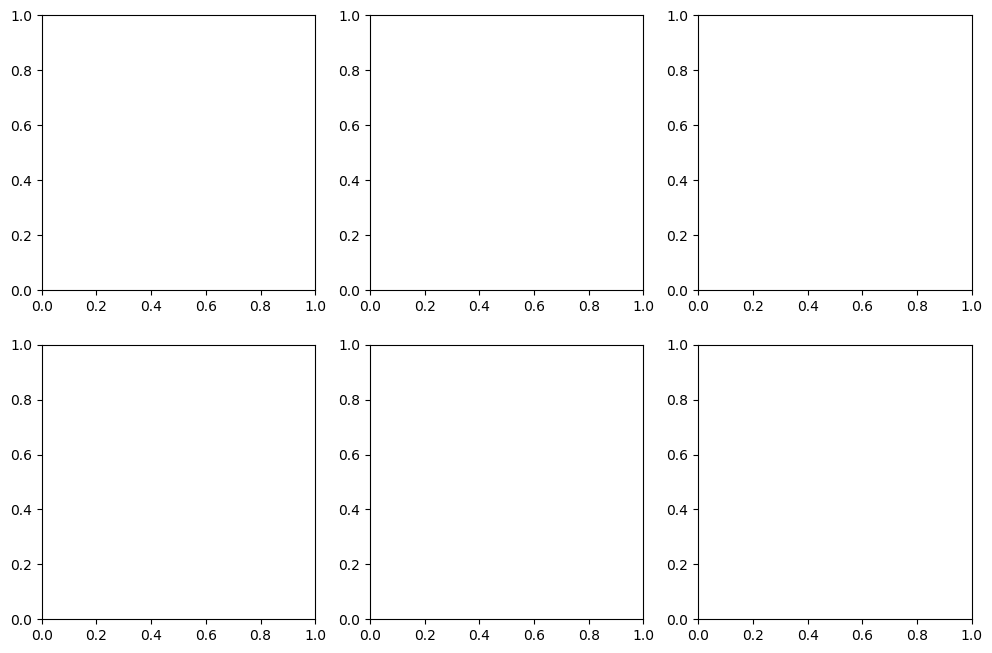

In [46]:
fig, axes = plt.subplots(2, 3) #Crete grid of subplots
axes

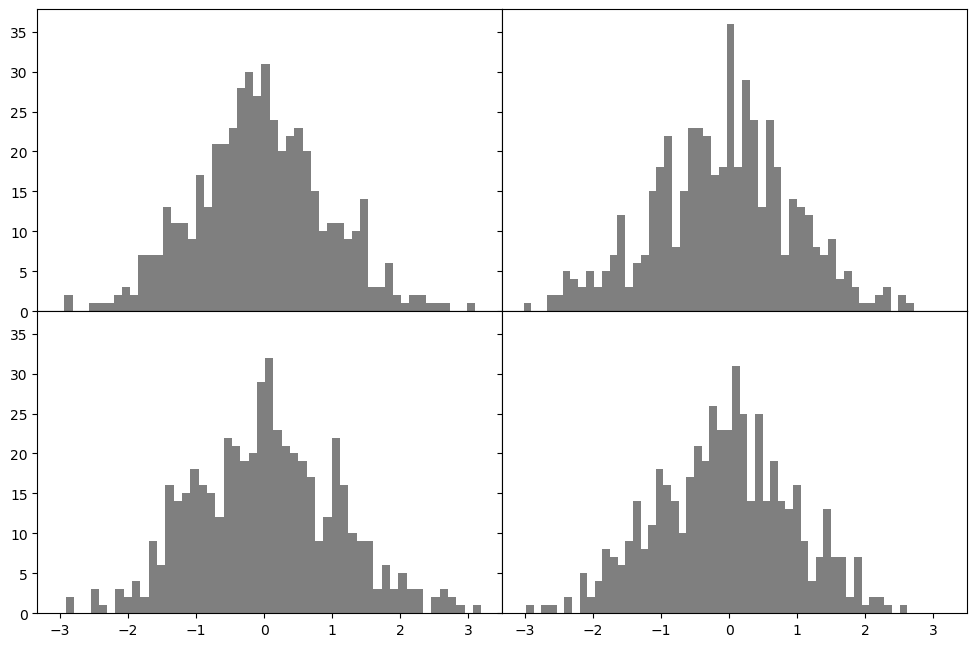

In [47]:
fig, axis = plt.subplots(2, 2, sharex= True, sharey = True) #Create 2X2 plots with the same x and y ticks
for i in range(2):
    for j in range(2):
        axis[i,j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = 0.5) #Create histograms
plt.subplots_adjust(wspace = 0, hspace = 0) #Makes spacing between plots 0

## Colours, Markers and Line Styles

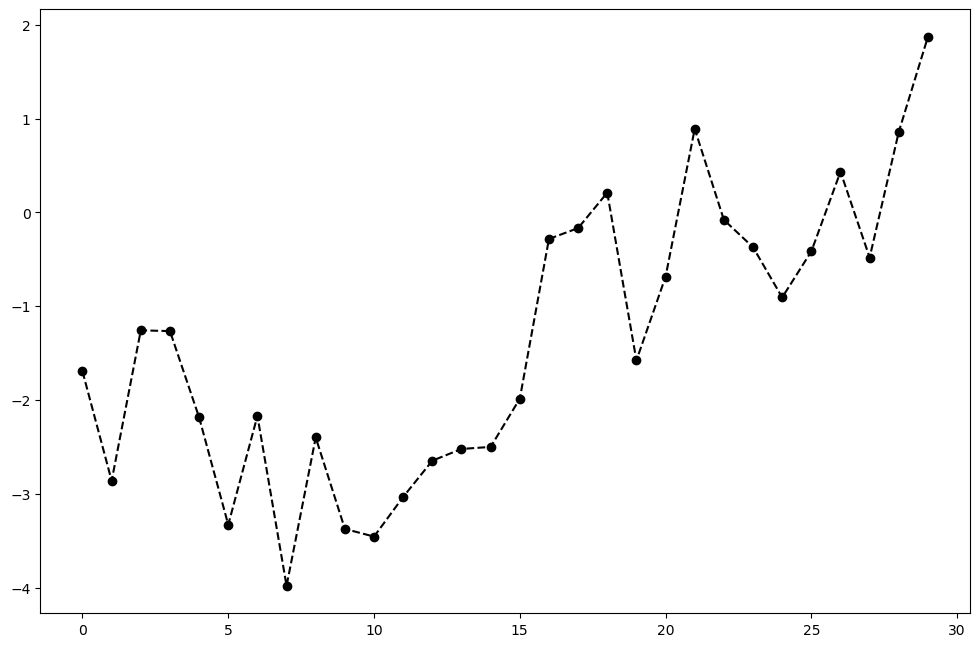

In [48]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')
plt.show()

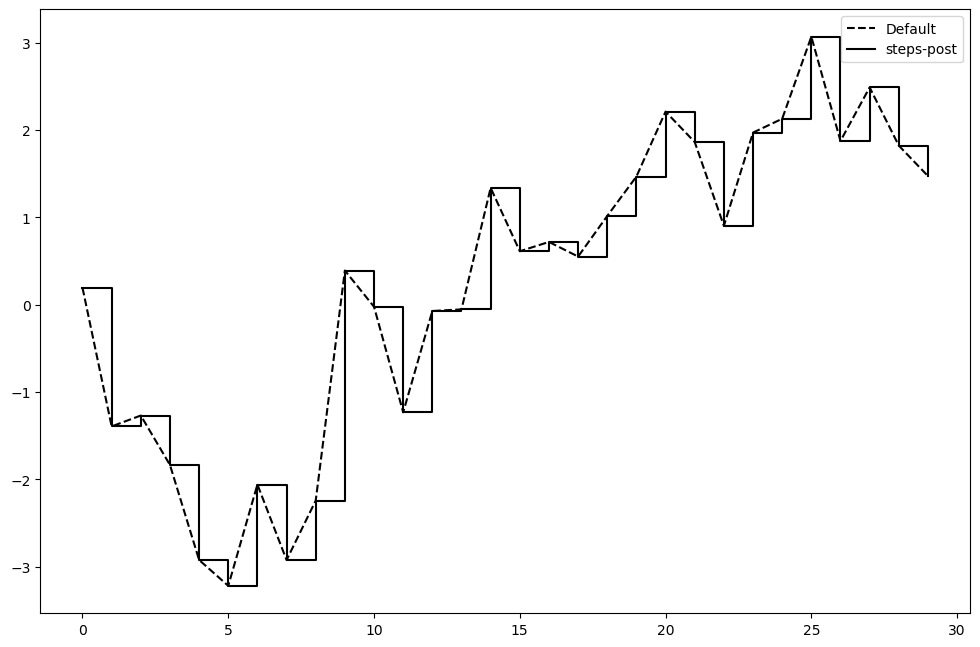

In [53]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label = "Default") #With linear interpolation
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'steps-post') #Without linear interpolation
plt.legend(loc='best')

## Ticks, Labels and Legends

Text(0.5, 0, 'Stages')

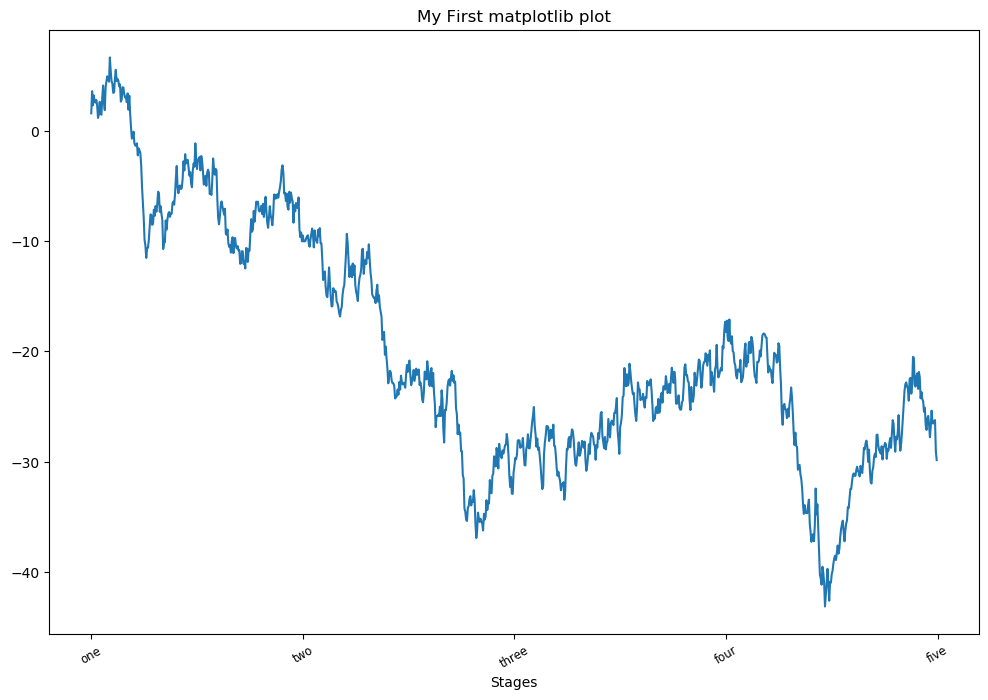

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #Set x-axis values
#Set x axis labels
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small') 
ax.set_title('My First matplotlib plot') #Title of graph
ax.set_xlabel('Stages') #Title of x axis

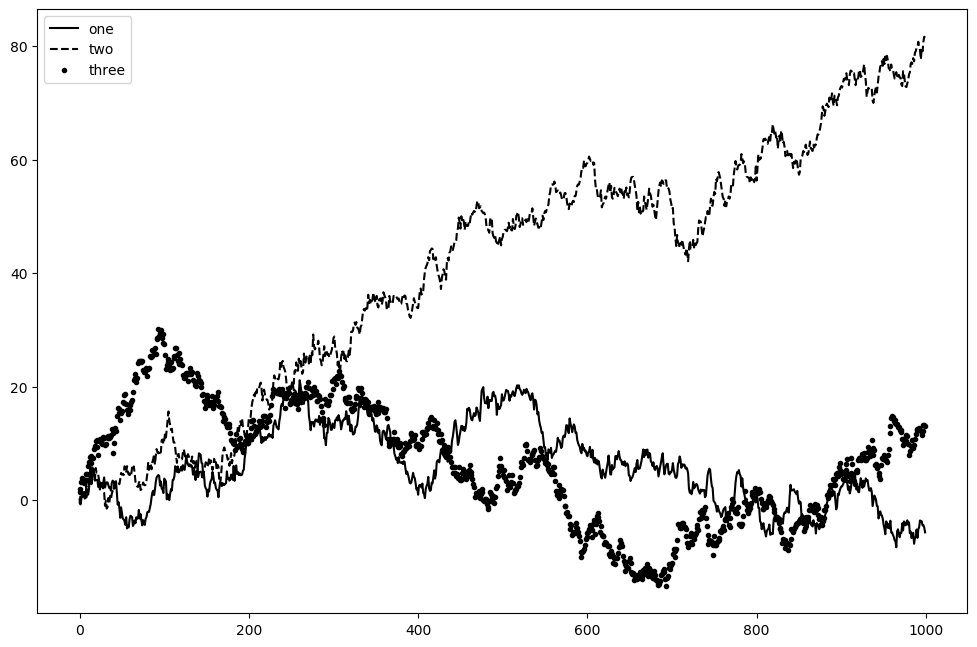

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label = 'one') #Solid line
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two') #Striked line
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three') #Dotted line
ax.legend(loc = 'best')

## Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

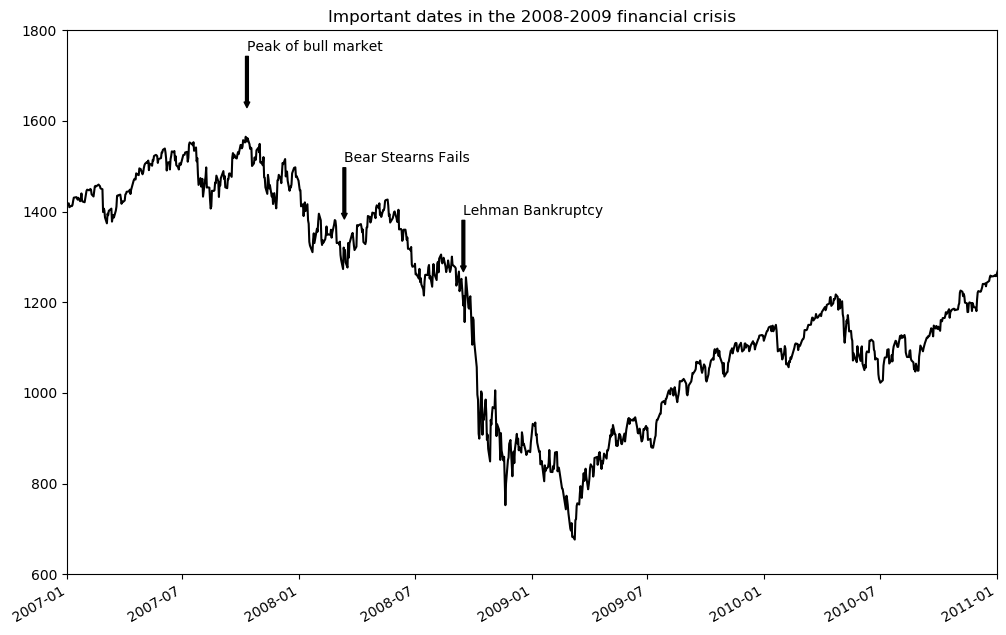

In [17]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1,1,1) #Create subplot

data = pd.read_csv('examples/spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX'] #Take values from column SPX

spx.plot(ax = ax, style = 'k-') #Splot spx values

crisis_data = [
 (datetime(2007, 10, 11), 'Peak of bull market'),
 (datetime(2008, 3, 12), 'Bear Stearns Fails'),
 (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    #Add annotation for each 
    ax.annotate(label, xy=(date, spx.asof(date) + 75),  #the xy point to annotate
     xytext=(date, spx.asof(date) + 225), # xy postition to place the text at
    #Format arrows
     arrowprops=dict(facecolor='black', headwidth=4, width=2,
     headlength=4),
     horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011']) #Limit x ticks
ax.set_ylim([600, 1800]) #Limit y ticks
ax.set_title('Important dates in the 2008-2009 financial crisis') #Add title

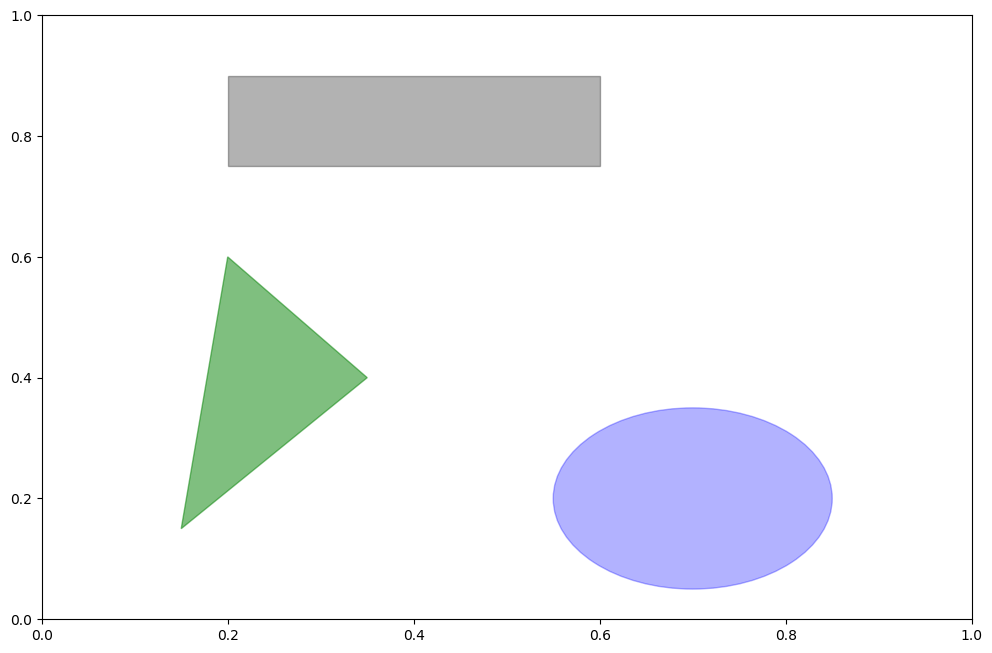

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) #Create rectangle
circ = plt.Circle( (0.7, 0.2), 0.15, color='b', alpha=0.3) #Create Circle
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5) #Create polygon

shapes = [rect, circ, pgon]
for shape in shapes:
    ax.add_patch(shape) #Add the shapes to the plot

## Plotting with pandas and seaborn

### Line Plots

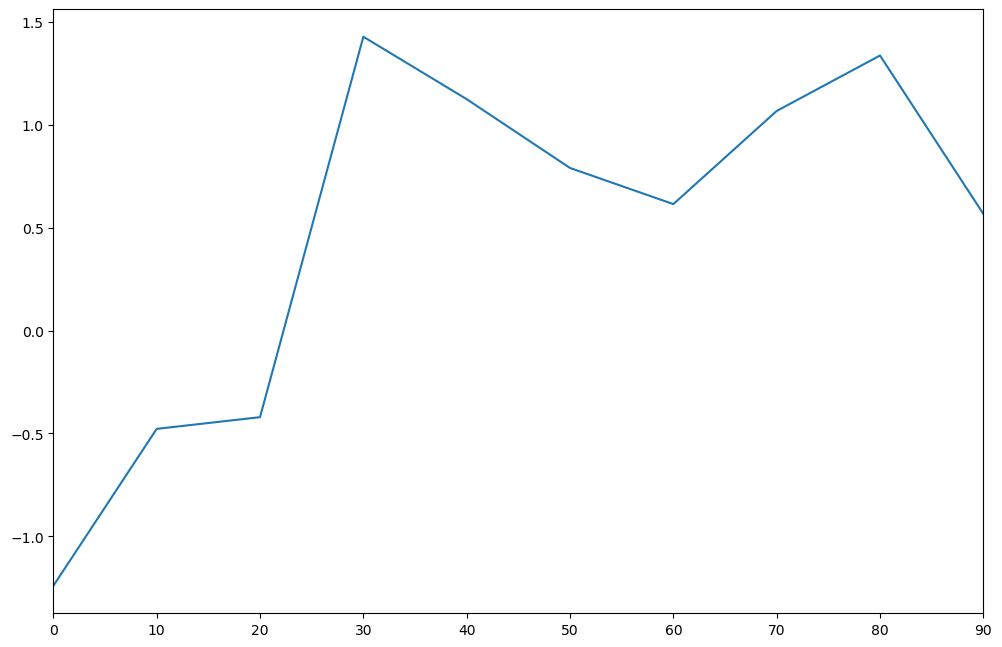

In [25]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100, 10)) #Series Plot
s.plot()

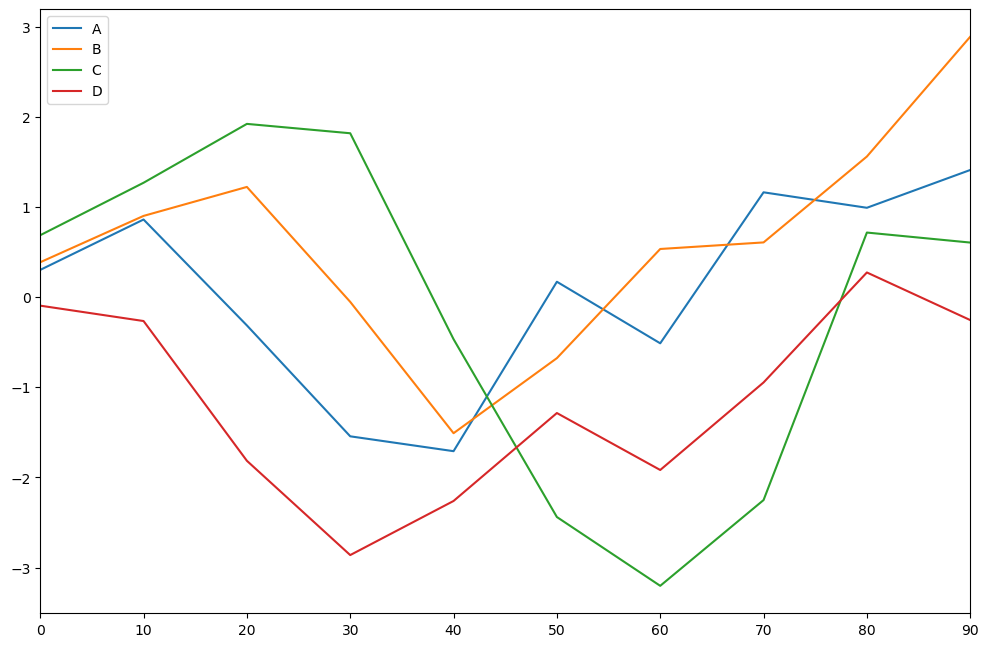

In [33]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
 ....: columns=['A', 'B', 'C', 'D'],
 ....: index=np.arange(0, 100, 10))
df.plot() #Automatically labls the plots with the columns

### Bar Plots

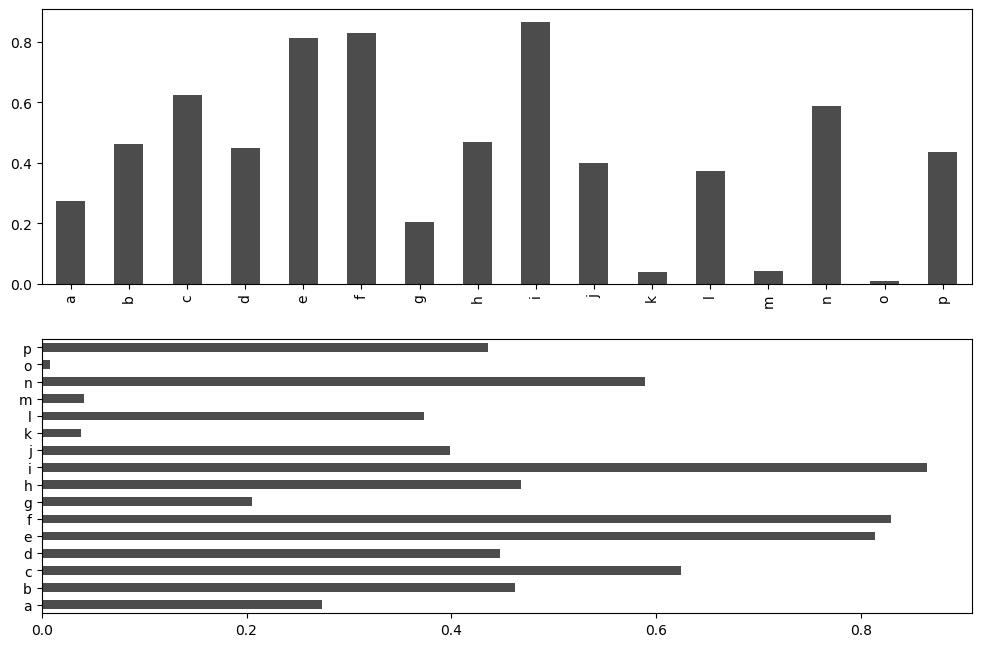

In [38]:
fig, axes = plt.subplots(2,1) #2x1 subplots
data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop')) 
data.plot.bar(ax=axes[0], color = 'k', alpha = 0.7) #Plot bar chart on the first plot
data.plot.barh(ax=axes[1], color='k', alpha=0.7) #Plot horizontal bar chart on the second plot

In [39]:
df = pd.DataFrame(np.random.rand(6, 4),
 ....: index=['one', 'two', 'three', 'four', 'five', 'six'],
 ....: columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.551039,0.108405,0.088157,0.644373
two,0.051596,0.438695,0.095116,0.051538
three,0.510257,0.573725,0.148482,0.881097
four,0.223697,0.287905,0.738536,0.192933
five,0.948254,0.094161,0.760789,0.124040
six,0.979503,0.249503,0.318908,0.561154


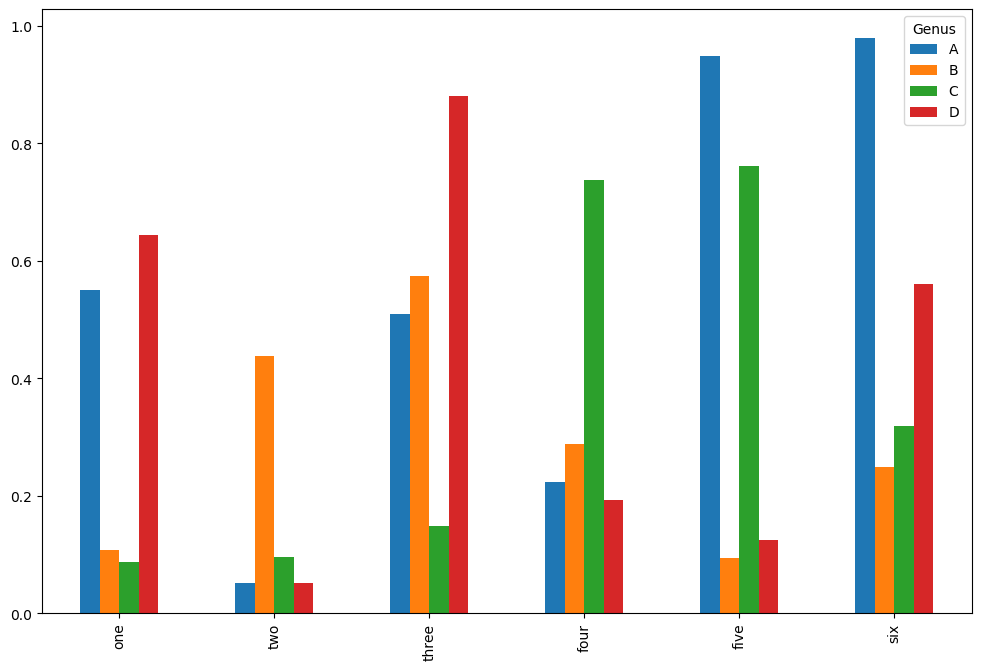

In [42]:
df.plot.bar() #Plots groups of bars

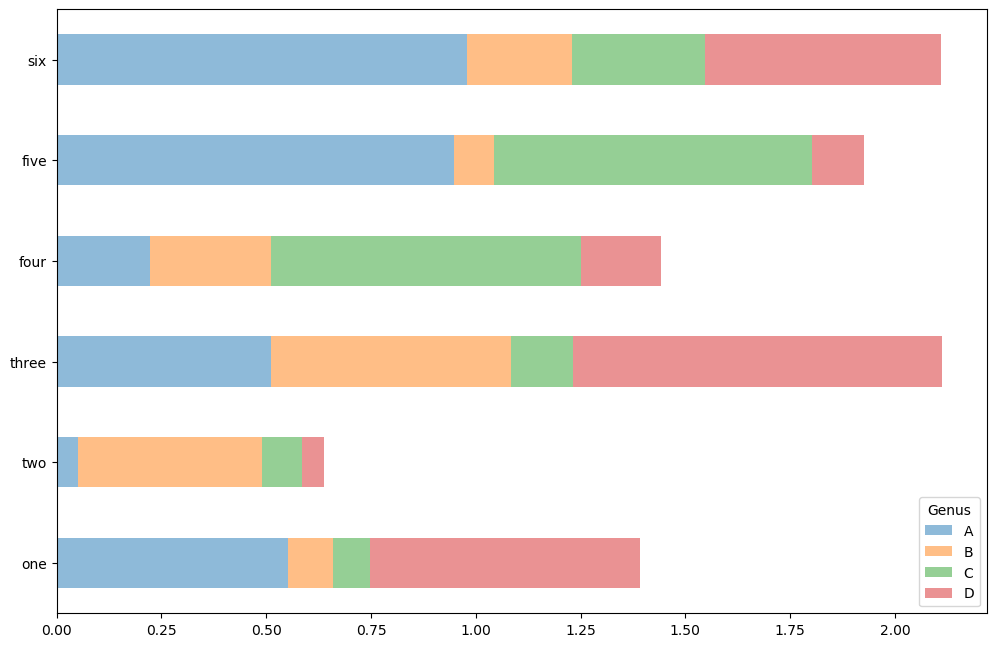

In [44]:
df.plot.barh(stacked = True, alpha = 0.5) #Stacked bar chart

In [6]:
tips = pd.read_csv('examples/tips.csv') #Read in file
party_counts = pd.crosstab(tips['day'], tips['size']) #Create table of tips per day by party size
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [8]:
party_counts = party_counts.loc[:, 2:5] #Remove first and last columns
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [9]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0) #Normalise sum to 1
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


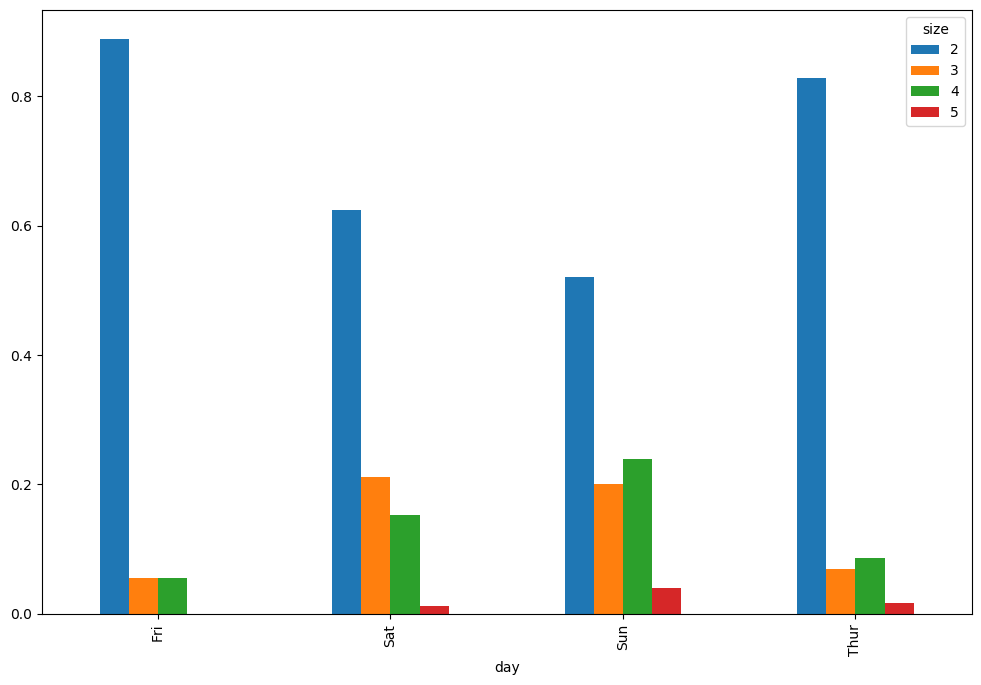

In [10]:
party_pcts.plot.bar()

In [11]:
import seaborn as sns

In [12]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) #Calculate tippings percentage by day
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


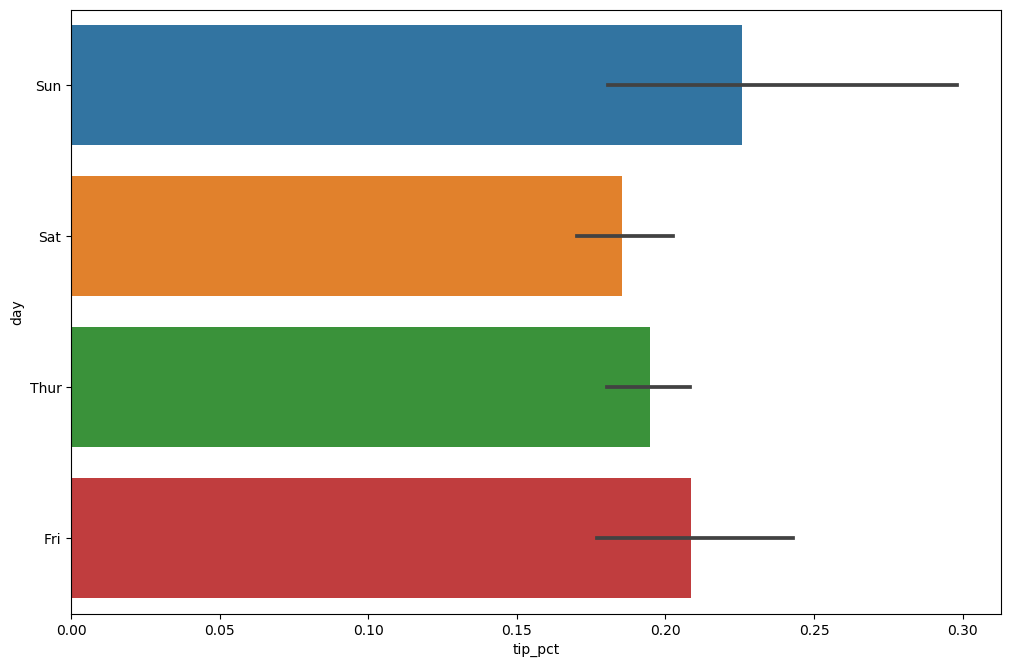

In [13]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h') #tip percentages by day with error bars

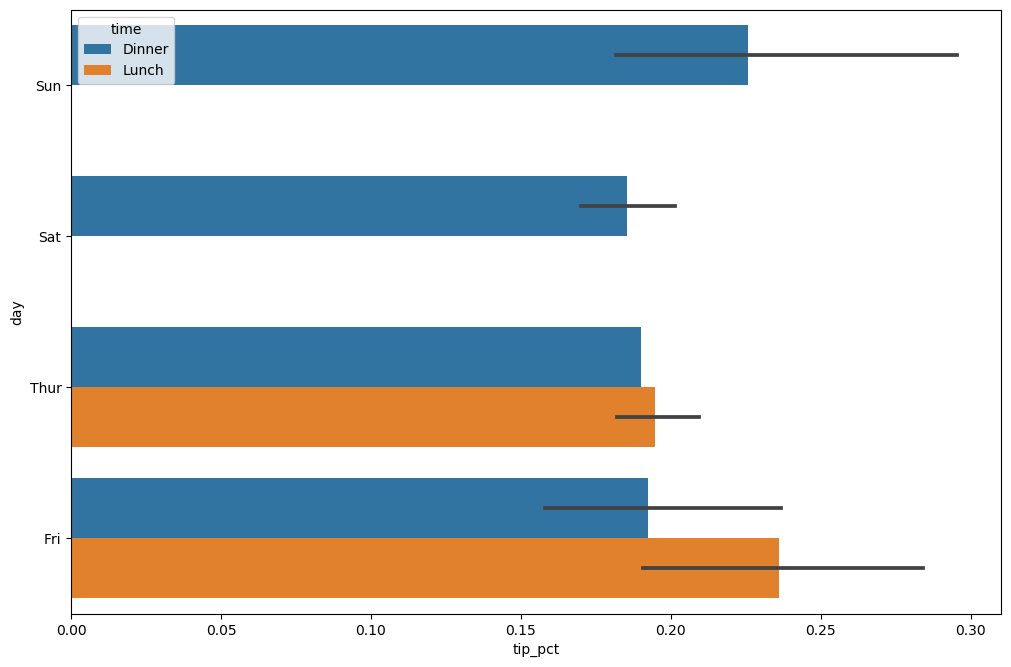

In [14]:
sns.barplot(x = 'tip_pct', y = 'day', hue='time', data = tips, orient = 'h' ) #Split by additional category

### Histograms and Density Plots

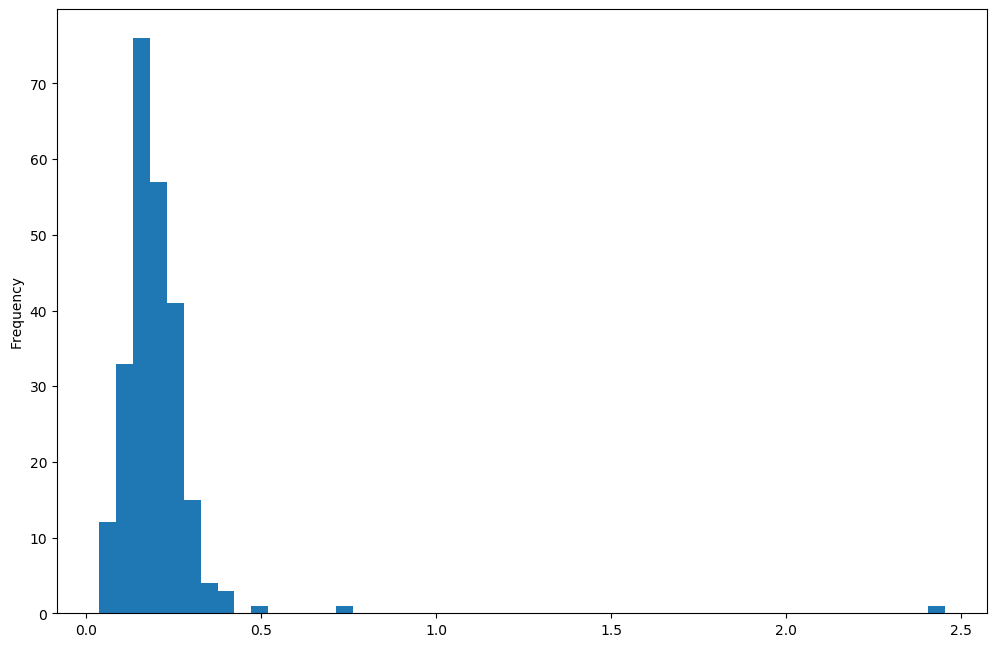

In [18]:
tips['tip_pct'].plot.hist(bins = 50) #Histogram of tip percentage

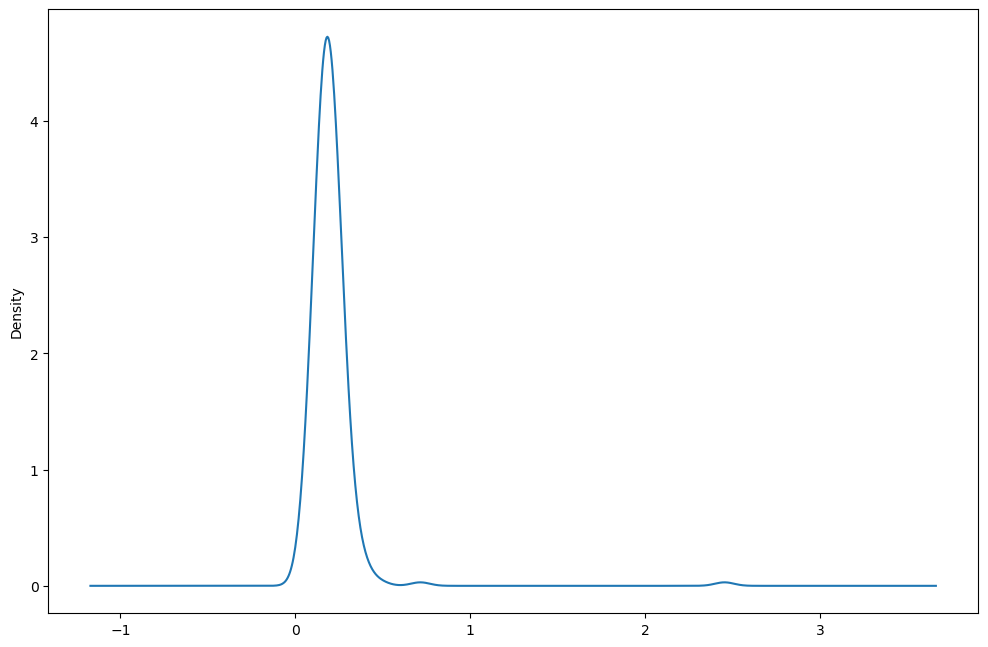

In [20]:
tips['tip_pct'].plot.density() #Produce density plot

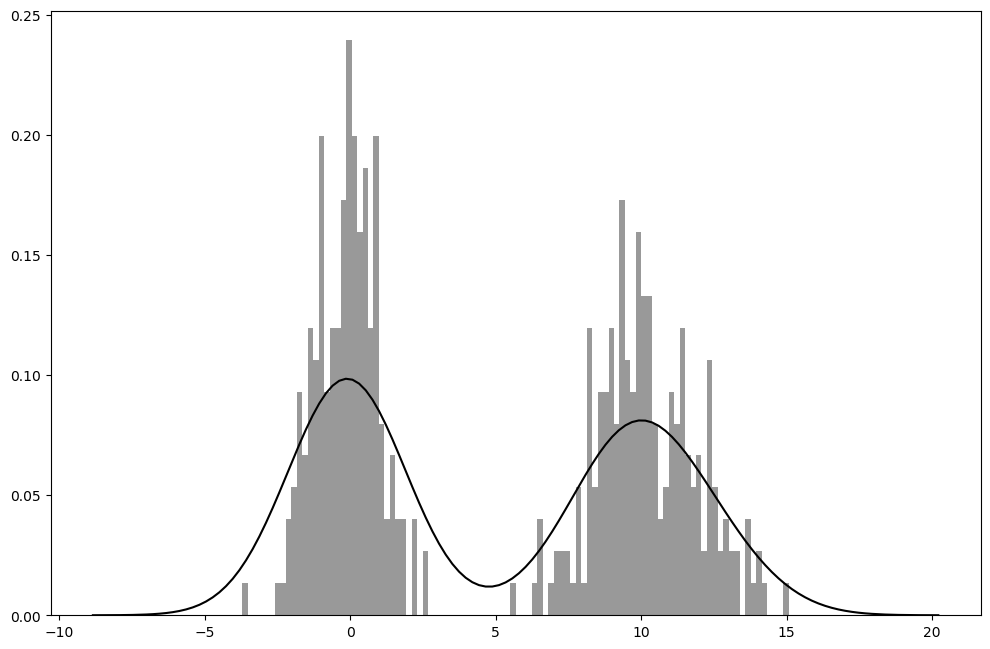

In [23]:
#Bimodal distribution with density estimate
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter Plots

In [28]:
macro = pd.read_csv('examples/macrodata.csv') #Read fule
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']] #Take columns
trans_data = np.log(data).diff().dropna() #Take the log, calculate the difference witht he previous value
trans_data[:5]

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

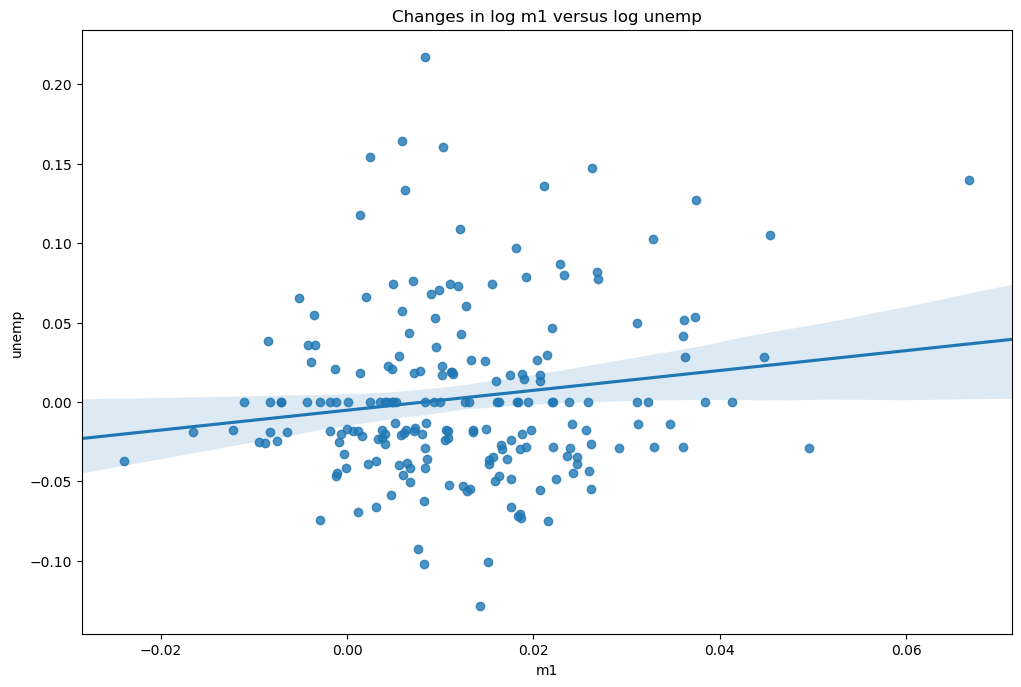

In [31]:
sns.regplot('m1', 'unemp', data = trans_data) #Scatter plot and linear regression line
plt.title("Changes in log %s versus log %s" %('m1', 'unemp'))

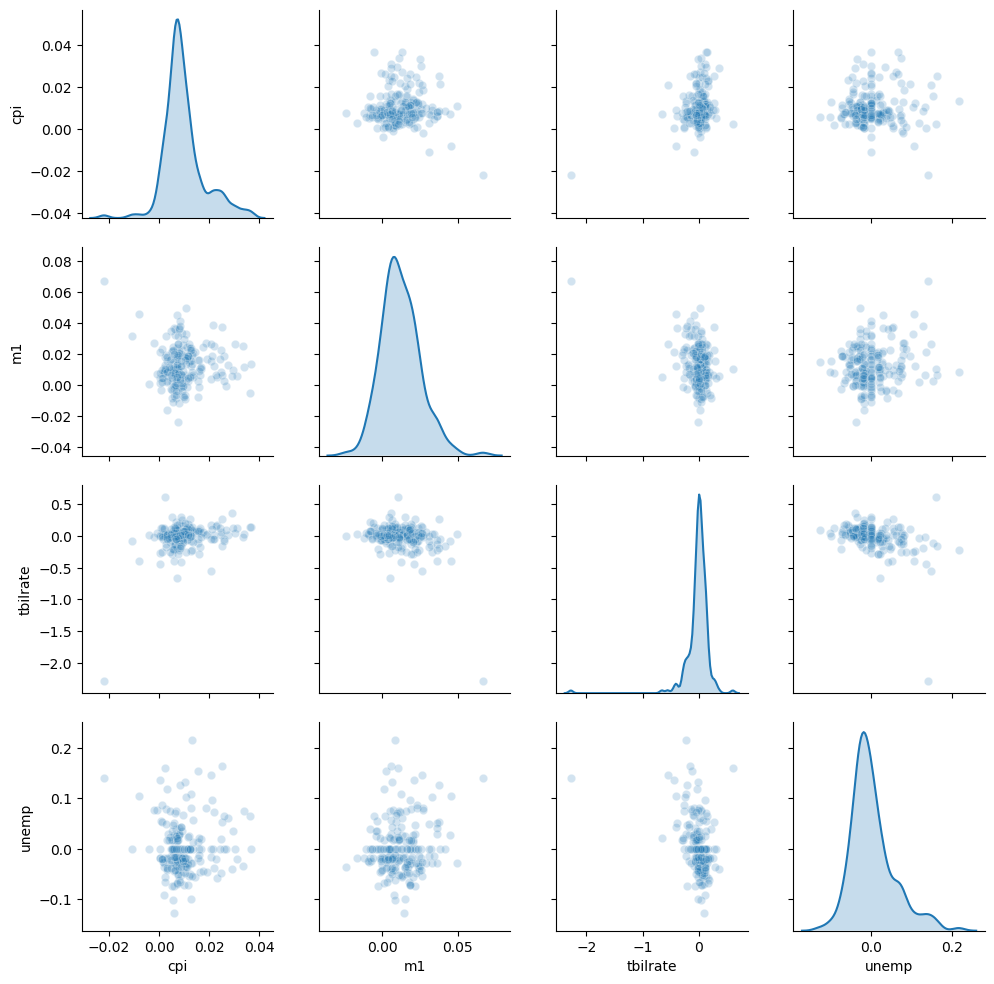

In [33]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2}) #Create pairplot for pairwise relationships

### Facet Grids and Categorical Data

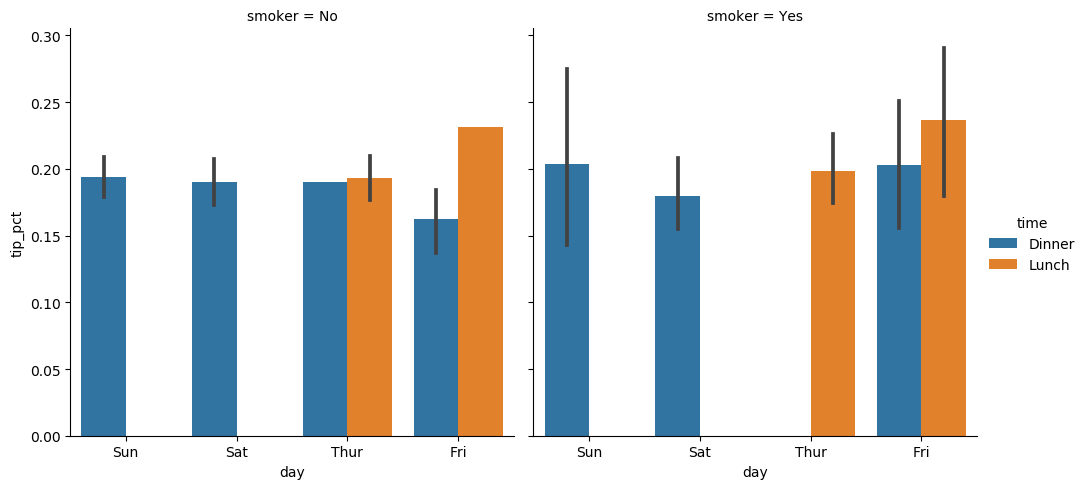

In [36]:
#Facet grid for tipping percentage by smoker for dinner and lunch
sns.catplot(x = 'day', y = 'tip_pct', hue = 'time', col='smoker', kind = 'bar', data = tips[tips.tip_pct< 1])

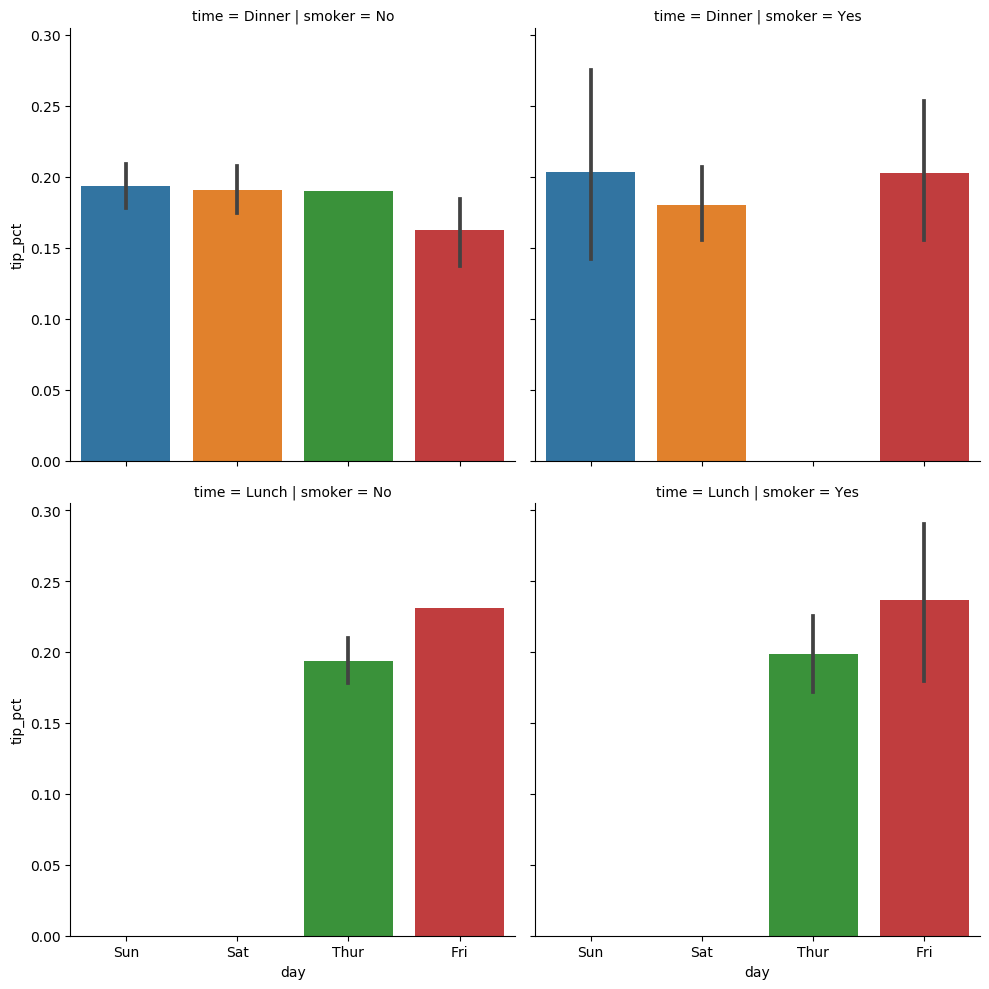

In [37]:
#Split into rows for each time of the day (dinner and lunch)
sns.factorplot(x='day', y='tip_pct', row='time',col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

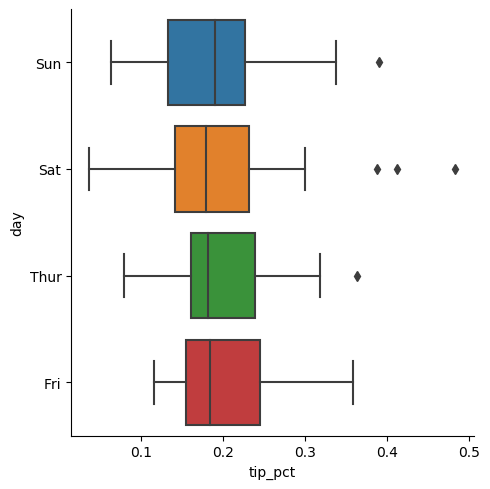

In [39]:
#Create boxplot for each day 
sns.catplot(x = 'tip_pct', y='day', kind = 'box', data = tips[tips.tip_pct < 0.5])